# 20181217_clf_ALL_xgb
1. 非死刑判例文(target=0), 死刑判例文(target=1),として辞書型のデータセットを作成</br>
2. tf-idfによる特徴量作成
3. SVMモデルのハイパーパラメータ調整

### 1. 非死刑判例文(target=0), 死刑判例文(target=1),として辞書型のデータセットを作成

In [1]:
#-------------------非死刑判例文(0)-------------------#
import glob
import os
import MeCab
import sys
import re
from collections import Counter

##### ファイルをリストに格納 #####
texts = []
dir_name_txt = "non_death_txt"
os.chdir('data/'+dir_name_txt)
name = glob.glob("*") #ファイル名リスト
for i in range(len(name)):
    f = open(str(name[i]), encoding="utf-8")
    texts.append(f.read())  # ファイル終端まで全て読んだデータを返す
    f.close()
os.chdir('..')
os.chdir('..')
print(len(name),len(texts))

data = []
num_test = 10 # testデータの数
for i in range(len(name)):
    ##### 名詞をリストに格納 #####
    items = []
    # パース
    mecab = MeCab.Tagger()
    parse = mecab.parse(texts[i])
    lines = parse.split('\n')
    items = (re.split('[\t,]', line) for line in lines)
    

    # 名詞をリストに格納
    words = [item[0]
             for item in items
             if (item[0] not in ('EOS', '', 't', 'ー') and
                 item[1] == '名詞' and item[2] == '一般')]

    # 名詞の間にスペースを入れて1文にする
    data_ = ""
    for j in range(len(words)):
        data_ = data_ + " "+words[j]
    data.append(data_)
    #print(len(data))

hanrei_test = {"file_name":[],"data":[],"target_name":[],"target":[]}
for i in range(num_test):
    hanrei_test["file_name"].append(name[i])
    hanrei_test["data"].append(data[i])
    hanrei_test["target_name"].append("non_death")
    hanrei_test["target"].append(0)

hanrei_train = {"file_name":[],"data":[],"target_name":[],"target":[]}
for i in range(num_test,len(data)):
    hanrei_train["file_name"].append(name[i])
    hanrei_train["data"].append(data[i])
    hanrei_train["target_name"].append("non_death")
    hanrei_train["target"].append(0)
    #{"data":str(i), "target_name":str(i), "target":str(i)})
print(len(hanrei_test["data"]),len(hanrei_train["data"]))

#-----------------------死刑判例文(1)--------------------------#

##### ファイルをリストに格納 #####
texts = []
dir_name_txt = "death_txt"
os.chdir('data/'+dir_name_txt)
name = glob.glob("*")
for i in range(len(name)):
    f = open(str(name[i]), encoding="utf-8")
    texts.append(f.read())  # ファイル終端まで全て読んだデータを返す
    f.close()
os.chdir('..')
os.chdir('..')
#print(len(name),len(texts))

data = []
for i in range(len(name)):
    ##### 名詞をリストに格納 #####
    items = []
    # パース
    mecab = MeCab.Tagger()
    parse = mecab.parse(texts[i])
    #print(parse)
    lines = parse.split('\n')
    items = (re.split('[\t,]', line) for line in lines)
    #print(items)
    # 名詞をリストに格納
    words = [item[0]
             for item in items
             if (item[0] not in ('EOS', '', 't', 'ー') and
                 item[1] == '名詞' and item[2] == '一般')]

    #名詞の間にスペースを入れて1文にする
    data_ = ""
    for j in range(len(words)):
        data_ = data_ + " "+words[j]
        
    data.append(data_)
#print(data)

#print(len(data))
for i in range(num_test):
    hanrei_test["file_name"].append(name[i])
    hanrei_test["data"].append(data[i])
    hanrei_test["target_name"].append("death")
    hanrei_test["target"].append(1)

for i in range(num_test,len(data)):
    hanrei_train["file_name"].append(name[i])
    hanrei_train["data"].append(data[i])
    hanrei_train["target_name"].append("death")
    hanrei_train["target"].append(1)
    

print(len(hanrei_test["data"]),len(hanrei_train["data"]))
print(hanrei_train["target_name"])

99 99
10 89
20 125
['non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_death', 'non_

### 参考：文書分散表現SCDVと他の分散表現を比較してみた
http://www.ie110704.net/2018/10/12/%E6%96%87%E6%9B%B8%E5%88%86%E6%95%A3%E8%A1%A8%E7%8F%BEscdv%E3%81%A8%E4%BB%96%E3%81%AE%E5%88%86%E6%95%A3%E8%A1%A8%E7%8F%BE%E3%82%92%E6%AF%94%E8%BC%83%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F/

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import datasets, manifold, mixture, model_selection
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from xgboost import XGBClassifier

C:\Users\monch\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
# BoW, tf-idf, average Word2Vec, Doc2Vec, SCDV
 
features_num = 200
min_word_count = 1
max_word_count = 20
context = 5
downsampling = 1e-3
epoch_num = 10

In [4]:
def analyzer(text):
    
    stop_words = ['の']
    text = text.replace('\n', '') # 改行削除
    text = text.replace('\t', '') # タブ削除
    text = re.sub(re.compile(r'[!-\/:-@[-`{-~]'), ' ', text) # 記号をスペースに置き換え
    text = text.split(' ') # スペースで区切る
    
    words = []
    for word in text:
        if (re.compile(r'^.*[0-9]+.*$').fullmatch(word) is not None): # 数字が含まれるものは除外
            continue
        if word in stop_words: # ストップワードに含まれるものは除外
            continue
        if len(word) < 2: #  1文字、0文字（空文字）は除外
            continue
        words.append(word)
        
    return words

### BoW

In [5]:
#corpus = [hanrei_train["data"] for i in range(len(hanrei_train["data"]))]
corpus = [hanrei_train["data"][i] for i in range(len(hanrei_train["data"]))]
count_vectorizer = CountVectorizer(analyzer=analyzer,min_df=min_word_count,max_df = max_word_count, binary=True)
bows = count_vectorizer.fit_transform(corpus)
bows.shape # (75,3446)
bows

<125x3031 sparse matrix of type '<class 'numpy.int64'>'
	with 7934 stored elements in Compressed Sparse Row format>

In [6]:
# sklearn :manifold
tsne_bow = manifold.TSNE(n_components=2).fit_transform(bows.toarray())
tsne_bow.shape # (2800, 2)

(125, 2)

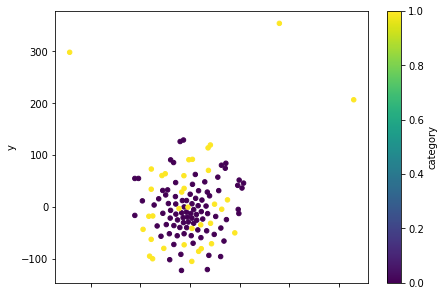

In [7]:
df_tsne_bow = pd.DataFrame({
    'x': tsne_bow[:, 0],
    'y': tsne_bow[:, 1],
    'category': hanrei_train["target"],
    })
 
df_tsne_bow.plot.scatter(x='x', y='y', c='category', colormap='viridis', figsize=(7, 5), s=20)
plt.show()

# tfidf

In [8]:
corpus = hanrei_train["data"]
tfidf_vectorizer = TfidfVectorizer(analyzer=analyzer, min_df=min_word_count)
tfidfs = tfidf_vectorizer.fit_transform(corpus)
tfidfs.shape 

(125, 3085)

In [9]:
tsne_tfidf = manifold.TSNE(n_components=2).fit_transform(tfidfs.toarray())
tsne_tfidf.shape 

(125, 2)

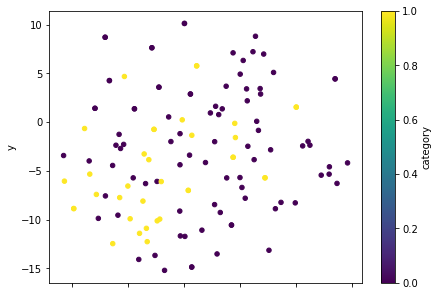

In [10]:
df_tsne_tfidf = pd.DataFrame({
    'x': tsne_tfidf[:, 0],
    'y': tsne_tfidf[:, 1],
    'category': hanrei_train["target"],
})

df_tsne_tfidf.plot.scatter(x='x', y='y', c='category', colormap='viridis', figsize=(7, 5), s=20)
plt.show()

### Word2Vec

In [11]:
corpus = [analyzer(hanrei_train["data"][i]) for i in range(len(hanrei_train["data"]))]
word2vecs = Word2Vec(
    sentences=corpus, iter=epoch_num, size=features_num,
    min_count=min_word_count, window=context, sample=downsampling,
)
avg_word2vec = np.array([word2vecs.wv[list(analyzer(hanrei_train["data"][i]) & word2vecs.wv.vocab.keys())].mean(axis=0) for i in range(len(hanrei_train["data"]))])
avg_word2vec.shape 

C:\Users\monch\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


(125, 200)

In [12]:
tsne_avg_word2vec = manifold.TSNE(n_components=2).fit_transform(avg_word2vec)
tsne_avg_word2vec.shape 

(125, 2)

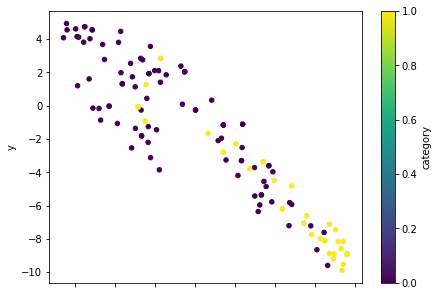

In [13]:
df_tsne_avg_word2vec = pd.DataFrame({
    'x': tsne_avg_word2vec[:, 0],
    'y': tsne_avg_word2vec[:, 1],
    'category': hanrei_train["target"],
})
 
df_tsne_avg_word2vec.plot.scatter(x='x', y='y', c='category', colormap='viridis', figsize=(7, 5), s=20)
plt.show()

### Doc2Vec

In [5]:
corpus = [TaggedDocument(words=analyzer(hanrei_train["data"][i]), tags=[hanrei_train["target"][i]]) for i in range(len(hanrei_train["data"]))]
doc2vecs = Doc2Vec(
    documents=corpus, dm=1,  epochs=epoch_num, vector_size=features_num,
    min_count=min_word_count, window=context, sample=downsampling
) # dm == 1 -> dmpv, dm != 1 -> DBoW
doc2vecs = np.array([doc2vecs.infer_vector(analyzer(hanrei_train["data"][i])) for i in range(len(hanrei_train["data"]))])
doc2vecs.shape #

C:\Users\monch\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


(125, 200)

In [6]:
tsne_doc2vec = manifold.TSNE(n_components=2).fit_transform(doc2vecs)
tsne_doc2vec.shape # 

(125, 2)

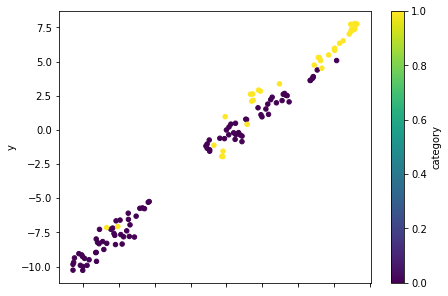

In [7]:
df_tsne_doc2vec = pd.DataFrame({
    'x': tsne_doc2vec[:, 0],
    'y': tsne_doc2vec[:, 1],
    'category': hanrei_train["target"],
})
 
df_tsne_doc2vec.plot.scatter(x='x', y='y', c='category', colormap='viridis', figsize=(7, 5), s=20)
plt.show()


https://github.com/dheeraj7596/SCDV

### SCDV

In [ ]:
word_vectors = word2vecs.wv.vectors
clusters_num = 60
gmm = mixture.GaussianMixture(n_components=clusters_num, covariance_type='tied', max_iter=50)
gmm.fit(word_vectors)

In [ ]:
idf_dic = dict(zip(tfidf_vectorizer.get_feature_names(), tfidf_vectorizer._tfidf.idf_))
assign_dic = dict(zip(word2vecs.wv.index2word, gmm.predict(word_vectors)))
soft_assign_dic = dict(zip(word2vecs.wv.index2word, gmm.predict_proba(word_vectors)))
 
word_topic_vecs = {}
for word in assign_dic:
    word_topic_vecs[word] = np.zeros(features_num*clusters_num, dtype=np.float32)
    for i in range(0, clusters_num):
        try:
            word_topic_vecs[word][i*features_num:(i+1)*features_num] = word2vecs.wv[word]*soft_assign_dic[word][i]*idf_dic[word]
        except:
            continue

In [ ]:
scdvs = np.zeros((len(hanrei_train["data"]), clusters_num*features_num), dtype=np.float32)
 
a_min = 0
a_max = 0
 
for i in range(len(hanrei_train["data"])):
    text = hanrei_train["data"][i]
    tmp = np.zeros(clusters_num*features_num, dtype=np.float32)
    words = analyzer(text)
    for word in words:
        if word in word_topic_vecs:
            tmp += word_topic_vecs[word]
    norm = np.sqrt(np.sum(tmp**2))
    if norm > 0:
        tmp /= norm
    a_min += min(tmp)
    a_max += max(tmp)
    scdvs[i] = tmp

p = 0.04
a_min = a_min*1.0 / len(hanrei_train["data"])
a_max = a_max*1.0 / len(hanrei_train["data"])
thres = (abs(a_min)+abs(a_max)) / 2
thres *= p
 
scdvs[abs(scdvs) < thres] = 0
scdvs.shape 

In [ ]:
tsne_scdv = manifold.TSNE(n_components=2).fit_transform(scdvs)
tsne_scdv.shape 

In [ ]:
df_tsne_scdv = pd.DataFrame({
    'x': tsne_scdv[:, 0],
    'y': tsne_scdv[:, 1],
    'category': hanrei_train["target"],
})
 
df_tsne_scdv.plot.scatter(x='x', y='y', c='category', colormap='viridis', figsize=(7, 5), s=20)
plt.show()

### XGBoostで分類

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = XGBClassifier()
 
df_compare = pd.DataFrame(columns=['name', 'train_accuracy', 'valid_accuracy', 'time'])
scoring = ['accuracy']
cv_trial_num = 8
 
# BoW
cv_rlts = model_selection.cross_validate(model, bows.toarray(), hanrei_train["target"], scoring=scoring, cv=cv_trial_num, return_train_score=True)
for i in range(cv_trial_num):
    s = pd.Series(['BoW', cv_rlts['train_accuracy'][i], cv_rlts['test_accuracy'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name='BoW'+str(i))
    df_compare = df_compare.append(s)

# tfidf
cv_rlts = model_selection.cross_validate(model, tfidfs.toarray(), hanrei_train["target"], scoring=scoring, cv=cv_trial_num, return_train_score=True)
for i in range(cv_trial_num):
    s = pd.Series(['tfidf', cv_rlts['train_accuracy'][i], cv_rlts['test_accuracy'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name='tfidf'+str(i))
    df_compare = df_compare.append(s)

# Word2Vec average
cv_rlts = model_selection.cross_validate(model, avg_word2vec, hanrei_train["target"], scoring=scoring, cv=cv_trial_num, return_train_score=True)
for i in range(cv_trial_num):
    s = pd.Series(['avg_Word2Vec', cv_rlts['train_accuracy'][i], cv_rlts['test_accuracy'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name='avg_Word2Vec'+str(i))
    df_compare = df_compare.append(s)

# Doc2Vec
cv_rlts = model_selection.cross_validate(model, doc2vecs, hanrei_train["target"], scoring=scoring, cv=cv_trial_num, return_train_score=True)
for i in range(cv_trial_num):
    s = pd.Series(['Doc2Vec', cv_rlts['train_accuracy'][i], cv_rlts['test_accuracy'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name='Doc2Vec'+str(i))
    df_compare = df_compare.append(s)

# SCDV
cv_rlts = model_selection.cross_validate(model, scdvs, hanrei_train["target"], scoring=scoring, cv=cv_trial_num, return_train_score=True)
for i in range(cv_trial_num):
    s = pd.Series(['SCDV', cv_rlts['train_accuracy'][i], cv_rlts['test_accuracy'][i], cv_rlts['fit_time'][i]], index=df_compare.columns, name='SCDV'+str(i))
    df_compare = df_compare.append(s)

plt.figure(figsize=(12,5))
sns.boxplot(data=df_compare, y='name', x='valid_accuracy', orient='h', palette='viridis', linewidth=0.5, width=0.5)
plt.grid()
plt.title('validation accuracy')
plt.show()

# テストデータの作成と予測

# test : Doc2Vec

In [ ]:
corpus = [TaggedDocument(words=analyzer(hanrei_test["data"][i]), tags=[hanrei_test["target"][i]]) for i in range(len(hanrei_test["data"]))]

doc2vecs_test = Doc2Vec(
                        documents=corpus, dm=1,  epochs=epoch_num, vector_size=features_num,
                        min_count=min_word_count, window=context, sample=downsampling
                        ) 

# dm == 1 -> dmpv, dm != 1 -> DBoW
doc2vecs_test = np.array([doc2vecs_test.infer_vector(analyzer(hanrei_test["data"][i])) for i in range(len(hanrei_test["data"]))])
doc2vecs_test.shape # 

C:\Users\monch\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [ ]:
tsne_doc2vec_test = manifold.TSNE(n_components=2).fit_transform(doc2vecs_test)
tsne_doc2vec_test.shape # 

In [ ]:
df_tsne_doc2vec = pd.DataFrame({
    'x': tsne_doc2vec_test[:, 0],
    'y': tsne_doc2vec_test[:, 1],
    'category': hanrei_test["target"],
})
 
df_tsne_doc2vec.plot.scatter(x='x', y='y', c='category', colormap='viridis', figsize=(7, 5), s=20)
plt.show()

In [ ]:
import xgboost as xgb

param_dist = {'objective':'binary:logistic', 'n_estimators':2}

clf = xgb.XGBClassifier(**param_dist)

X_train = doc2vecs
y_train = hanrei_train["target"]
X_test = doc2vecs_test
y_test = hanrei_test["target"]



clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='logloss',
        verbose=True)

#clf.fit(X_train, y_train)

evals_result = clf.evals_result()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
pred = clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

In [ ]:
pred

In [ ]:
y_test